Muenster TPC basic program for load in data from root tree
==========================================================

This notebook is a basic script to read in in rootfiles of the Muenster TPC processed with pax.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [3]:
import hax
hax.config.CONFIG['main_data_paths'].append('/home/axel/ownCloud/documents/Masterarbeit/TPC/rawdata/Kr83m_dual_phase/during_recup/')
hax.runs.update_datasets()

./Cs137.Thr3000ADC_160211_Basics.root
./Cs137.Thr3000ADC_160211_000_s2width.root
./Cs137.Thr3000ADC_160211_000_Basics.root
./Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence_s2width.root
./Cs137.Thr3000ADC_160211_Basics.root
./Cs137.Thr3000ADC_160211_000_s2width.root
./Cs137.Thr3000ADC_160211_000_Basics.root
./Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence_s2width.root
/home/axel/ownCloud/documents/Masterarbeit/TPC/rawdata/Kr83m_dual_phase/during_recup/Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence.root


/home/axel/anaconda3/envs/pax/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
class s2width(hax.minitrees.TreeMaker):
     # Activate the required branch while reading in the ROOT file
     extra_branches = ['peaks.range_area_decile[11]']
     __version__ = '0.0.1'

     def extract_data(self, event):
         # If there are no interactions at all, we can't extract anything...
         if not len(event.interactions):
             return dict()

         # Get the main S2
         s2 = event.peaks[event.interactions[0].s2]

         return dict(s2_width=s2.range_area_decile[5])



In [5]:
dataset = 'Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence'
data = hax.minitrees.load(dataset, treemakers=[s2width, 'Basics'])

Found minitree at ./Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence_s2width.root
Don't know a dataset named Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence, trying to find it anyway...


Created minitree Basics for dataset Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence


In [22]:
print(len(data))
len(data[data['s1'] > 0 ]) / len(data)

627556


0.10802701272874453

In [47]:
# Require a proper S1 + S2
xdata = data[data['s1'] > 0 ]
xdata = xdata[xdata['s2'] > 0 ]
# how many percent have been cut?
len(xdata) / len(data)

0.10802701272874453

In [8]:
class Ncontribut(hax.minitrees.TreeMaker):
    # Activate the required branch while reading in the ROOT file
    # If you're too lazy to specify this, just put '*', but your TreeMaker will run slow!
    extra_branches = ['peaks.n_hits']
    __version__ = '0.0.1'
    
    def extract_data(self, event):
        # If there are no interactions at all, we can't extract anything...
        if not len(event.interactions):
            return dict()
        
        # Get the main S1 and main S2
        s1 = event.peaks[event.interactions[0].s1]
        s2 = event.peaks[event.interactions[0].s2]
        
        return dict(s1_n_hits=s1.n_hits,
                    s2_n_hits=s2.n_hits)

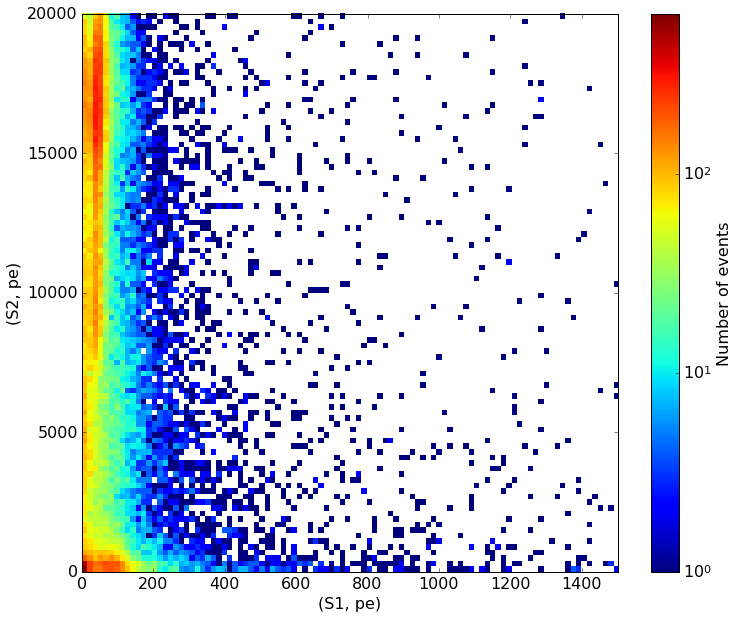

In [9]:

s1 = xdata['s1'].values
s2 = xdata['s2'].values
s2_other = xdata['largest_other_s2'].values
# Make an S1 vs S2 histogram
#plt.hist2d(np.log10(data['cs1']), np.log10(data['cs2']),
plt.hist2d(s1, s2,
           range=((0,1500), (0,20000)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(S1, pe)')
plt.ylabel('(S2, pe)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

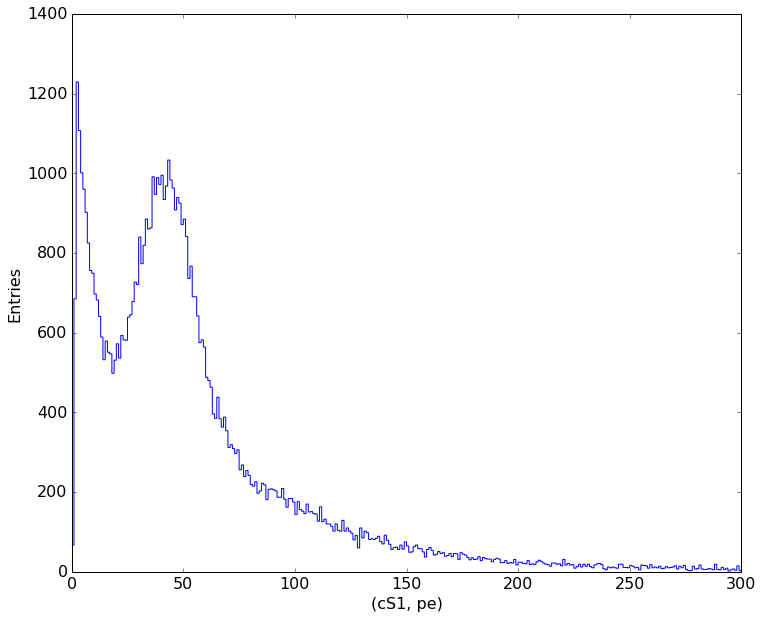

In [29]:
s1data = data[data['cs1'] > 0 ]
s1 = s1data['cs1'].values
plt.hist(s1,
           range=(0,300),
           bins=300,
           histtype='step',
)
plt.xlabel('(cS1, pe)')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

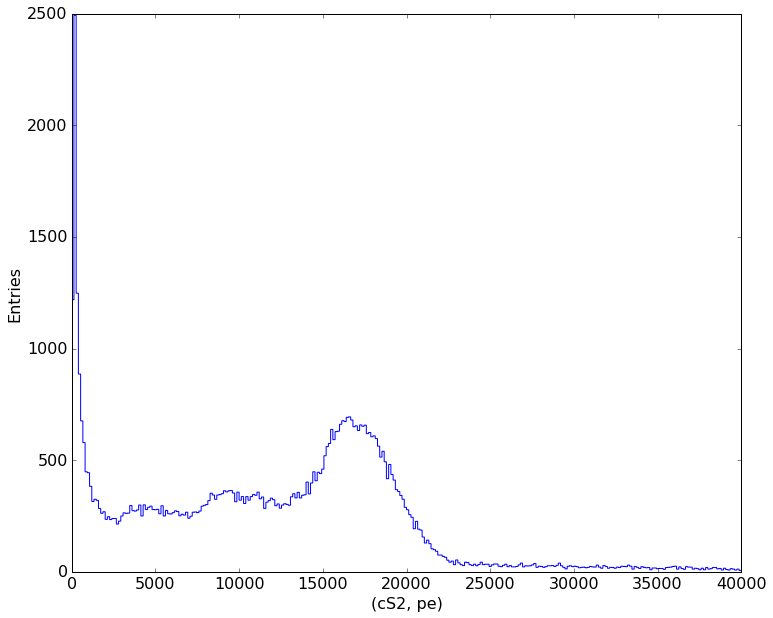

In [27]:
s2data = data[data['s2'] > 0 ]
s2 = s2data['s2'].values
plt.hist(s2,
           range=(0,4e4),
           bins=300,
           histtype='step',
)
plt.xlabel('(cS2, pe)')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

In [12]:
xdata.head(10)

,index,s2_width,index,cs1,cs2,dataset_number,drift_time,event_number,event_time,largest_coincidence,...,largest_other_s2,largest_unknown,largest_veto,s1,s1_area_fraction_top,s2,s2_area_fraction_top,x,y,z
16,16,980.843788,16,90.961617,653.678345,0,14532.282227,16,1455624336000000000,0,...,0.000000,0.000000,0,90.961617,0.377993,653.678345,0.754954,-1.592988,1.148767,NaN
19,19,852.996180,19,106.102737,160.104965,0,52136.992188,19,1455624336000000000,0,...,0.000000,0.000000,0,106.102737,0.154432,160.104965,0.861864,-1.716248,1.118805,NaN
26,26,1991.582107,26,13.728106,20153.238281,0,3846.991211,26,1455624336000000000,0,...,224.358521,0.000000,0,13.728106,1.000000,20153.238281,0.778464,2.141892,0.877871,NaN
33,33,885.637476,33,82.817978,152.272461,0,22302.089844,33,1455624336000000000,0,...,0.000000,0.000000,0,82.817978,0.241679,152.272461,0.780063,-1.610505,0.176711,NaN
36,36,896.725255,36,123.381172,744.446106,0,18539.867188,36,1455624336000000000,0,...,0.000000,0.000000,0,123.381172,0.329047,744.446106,0.769983,-1.522116,1.346666,NaN
37,37,835.778444,37,65.362267,714.642151,0,18406.351562,37,1455624336000000000,0,...,0.000000,0.000000,0,65.362267,0.389610,714.642151,0.781829,-1.757225,1.228212,NaN
40,40,1146.814653,40,7.864581,918.372131,0,2210.024414,40,1455624336000000000,0,...,0.000000,35.306824,0,7.864581,0.542245,918.372131,0.804160,-2.121921,0.629817,NaN
44,44,1793.419940,44,26.383539,813.104919,0,51694.144531,44,1455624336000000000,0,...,226.369171,0.000000,0,26.383539,0.000000,813.104919,0.617229,-1.461217,-0.149083,NaN
61,61,990.065467,61,1.644177,15020.563477,0,1285.753174,61,1455624336000000000,0,...,0.000000,0.000000,0,1.644177,0.617215,15020.563477,0.769808,-2.272354,-0.800590,NaN
83,83,991.264528,83,3.959921,19106.386719,0,2167.041260,83,1455624336000000000,0,...,0.000000,0.000000,0,3.959921,0.454665,19106.386719,0.721256,-0.245959,2.060690,NaN


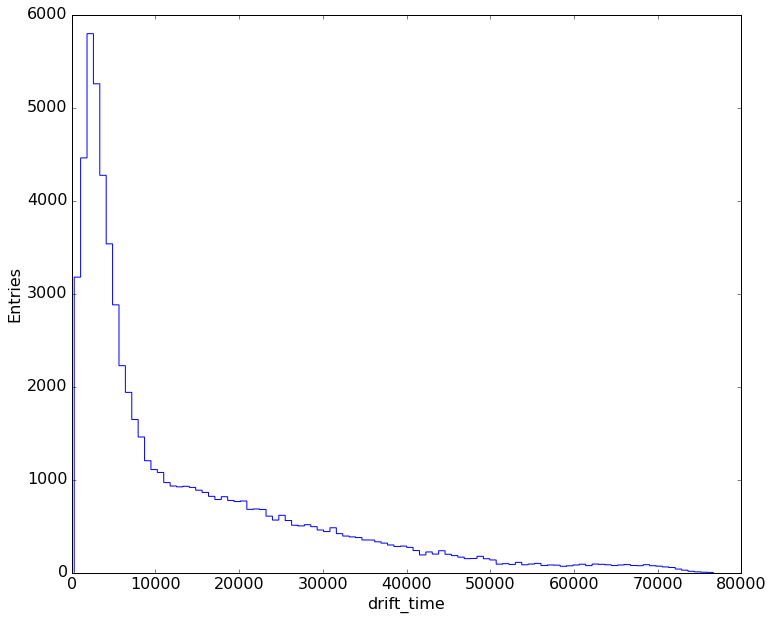

In [13]:
drift_time = xdata['drift_time'].values
plt.hist(drift_time,
          # range=(0,1e5),
           bins=100,
           histtype='step',
)
plt.xlabel('drift_time')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

1455628390.0 - 1455624336.0
1455628390.0


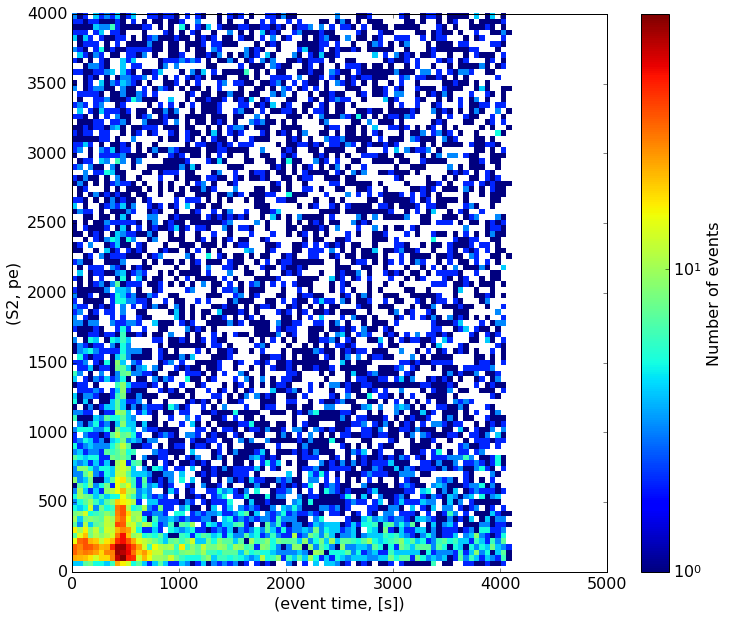

In [57]:
print(data["event_time"].values[-1]//1e9, "-", s2data["event_time"].values[0]//1e9)
print(data["event_time"].values[-1]//1e9)
plt.hist2d((data["event_time"].values-data["event_time"].values[0])//1e9, data["s2"].values,
           range=((0,5000), (0,4000)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(event time, [s])')
plt.ylabel('(S2, pe)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

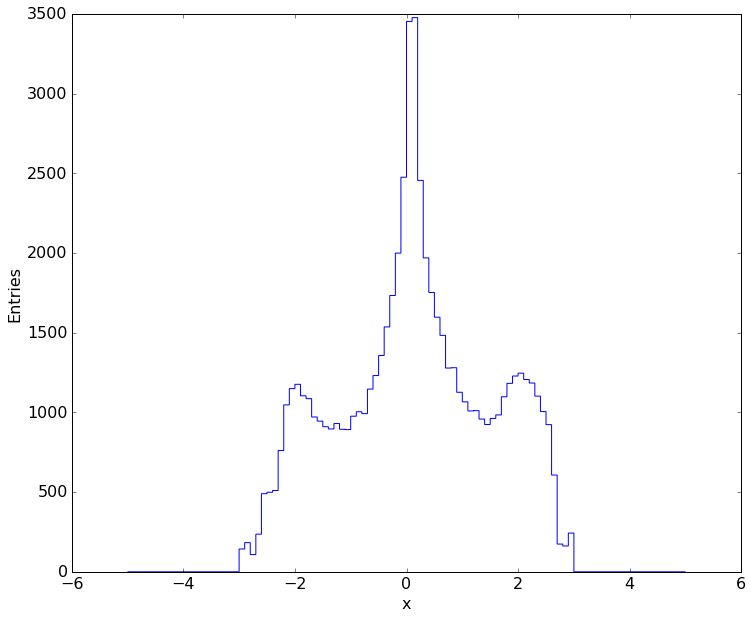

In [15]:
x = xdata['x'].values
plt.hist(x,
           range=(-5,5),
           bins=100,
           histtype='step',
)
plt.xlabel('x')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

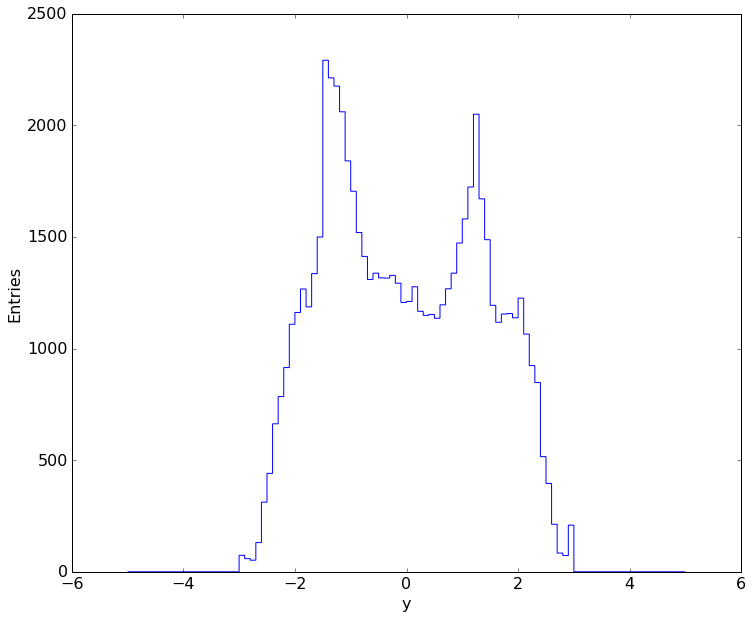

In [16]:
y = xdata['y'].values
plt.hist(y,
           range=(-5,5),
           bins=100,
           histtype='step',
)
plt.xlabel('y')
plt.ylabel('Entries')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
plt.show()

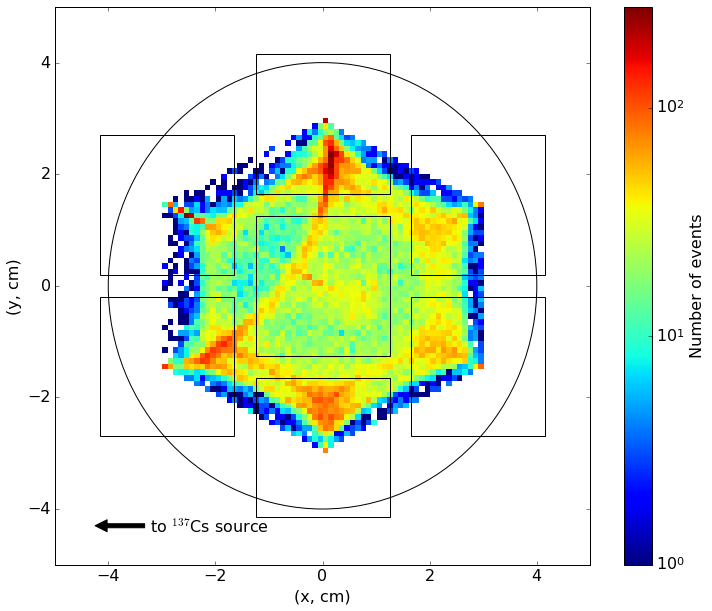

In [17]:
plt.hist2d(x, y,
           range=((-5,5), (-5,5)),
           bins=100, 
           norm=matplotlib.colors.LogNorm()   # Logarithmic color scale
)
plt.colorbar(label='Number of events')
plt.xlabel('(x, cm)')
plt.ylabel('(y, cm)')
#plt.xlim(0, 2000)
#plt.ylim(0, 50000)
if True:   # annotation with boxes etc...
    import matplotlib.patches as patches
    def drawPMT(x_pos = 0, y_pos = 0):  
        ax = plt.gca()
        ax.add_patch(
            patches.Rectangle(
                (x_pos-2.5/2 ,y_pos-2.5/2), # x, y
                2.5,         # width
                2.5,        # height
                fill = False,
                joinstyle = "bevel"
                )
            )
    cm = 1
    pmt_locations =  [{'x':  -2.900 * cm, 'y':  -1.450 * cm},  # 7 ↓↓↓ top ↓↓↓
            {'x':  -2.900 * cm, 'y':  +1.450 * cm},  # 8
            {'x':   0.000 * cm, 'y':  +2.900 * cm},  # 9
            {'x':   0.000 * cm, 'y':   0.000 * cm},  # 10
            {'x':   0.000 * cm, 'y':  -2.900 * cm},  # 11
            {'x':   2.900 * cm, 'y':  -1.450 * cm},  # 12
            {'x':   2.900 * cm, 'y':   1.450 * cm},  # 13
            ]
    for pmt in pmt_locations:
        drawPMT(pmt["x"], pmt["y"])
    ##### TPC radius
    ax = plt.gca()
    ax.add_patch(
        patches.Circle(
            (0.0 ,0.0 ),
            4,
            fill = False))
    ##### arrow to Lab
    ax.annotate(r"to $^{137}$Cs source",
               (-4.3, -4.3),
               (-1, -4.3),
               arrowprops = dict(facecolor="black", shrink=0.05),
               horizontalalignment="right", verticalalignment="center")
plt.show()

In [18]:
s2drifttime = data["drift_time"][~np.isnan(data["drift_time"])]
s2width= data["s2_width"][~np.isnan(data["s2_width"])]

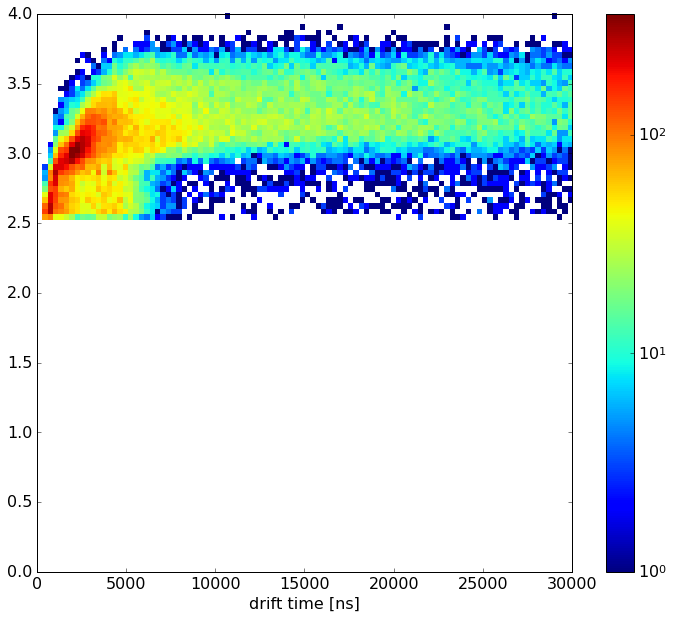

In [19]:
plt.hist2d(s2drifttime, np.log10(s2width),
          bins = 100,
          norm= matplotlib.colors.LogNorm(),
          range = [[0,30000], [0, 4]]
          )
plt.colorbar()
plt.xlabel("drift time [ns]")
plt.show()

In [20]:
string = "Kr83m_anode_2.8_cathode_10.72_while_recuperating_S2_dependence_000.eve"

In [21]:
string[-7:-4]

'000'